## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice in the DataFrame.
total_mouse_count = mouse_df["Mouse ID"].count()
total_unique_mouse_count = mouse_df["Mouse ID"].nunique()
print(f"{total_mouse_count} total mice IDs")
print(f"{total_unique_mouse_count} unique mice IDs")

1893 total mice IDs
249 unique mice IDs


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_mouse_df = mouse_df.duplicated()
duplicates = mouse_df.loc[duplicates_mouse_df == True]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df.drop_duplicates()
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
total_clean_mouse_count = clean_mouse_df["Mouse ID"].count()
total_clean_unique_mouse_count = clean_mouse_df["Mouse ID"].nunique()
print(f"{total_clean_mouse_count} total mice IDs")
print(f"{total_clean_unique_mouse_count} unique mice IDs")

1892 total mice IDs
249 unique mice IDs


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimen_df = clean_mouse_df.groupby(["Drug Regimen"])
# print(grouped_regimen_df['Tumor Volume (mm3)'].describe())
regimen_mean = grouped_regimen_df['Tumor Volume (mm3)'].mean()
regimen_median = grouped_regimen_df['Tumor Volume (mm3)'].median()
regimen_std_dev = grouped_regimen_df['Tumor Volume (mm3)'].std()
regimen_variance = grouped_regimen_df['Tumor Volume (mm3)'].var()
regimen_sem = grouped_regimen_df['Tumor Volume (mm3)'].sem()
regimen_mice_count = grouped_regimen_df['Mouse ID'].nunique()
# print(regimen_mean)
# print(regimen_median)
# print(regimen_variance)
# print(regimen_std_dev)
# print(regimen_sem)

grouped_regimen_summary_df = pd.DataFrame({"Mouse Count": regimen_mice_count,
                                           "Mean (Tumor Volume)": regimen_mean,
                                           "Median (Tumor Volume)": regimen_median,
                                           "Standard Deviation (Tumor Volume)": regimen_std_dev,
                                           "Variance (Tumor Volume)": regimen_variance,
                                           "Standard Error of the Mean (Tumor Volume)": regimen_sem})

grouped_regimen_summary_df
# This method produces everything in a single groupby function.

,Mouse Count,Mean (Tumor Volume),Median (Tumor Volume),Standard Deviation (Tumor Volume),Variance (Tumor Volume),Standard Error of the Mean (Tumor Volume)
Drug Regimen,,,,,,
Capomulin,25,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,25,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,25,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,25,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,25,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,25,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,25,52.368318,50.909965,6.502160,42.278090,0.514041
Ramicane,25,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,24,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar Plots

<IPython.core.display.Javascript object>


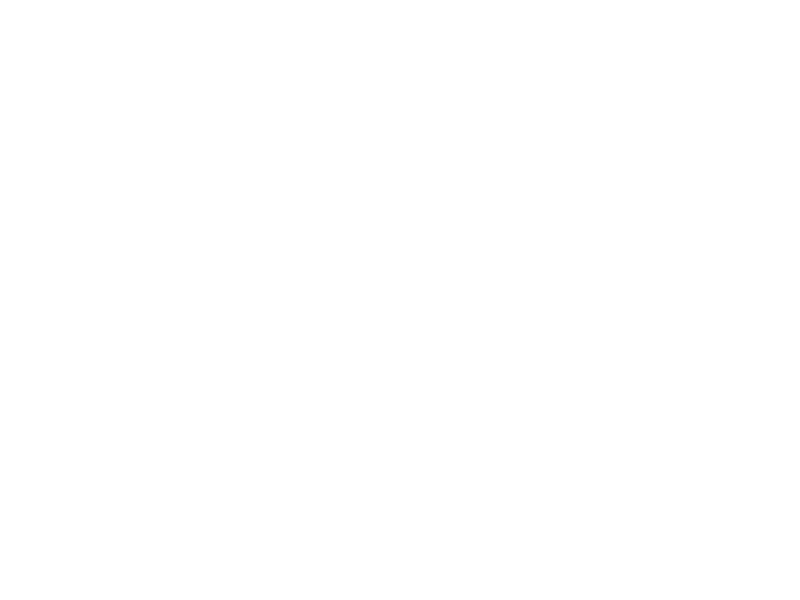

In [8]:
# # # Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

# grouped_multiple = clean_mouse_df.groupby(["Drug Regimen", "Timepoint"])
# regimen_timepoint_mice_count = grouped_multiple['Mouse ID'].nunique()
# multigrouped_regimen_timepoint = pd.DataFrame({ "Mouse Count": regimen_timepoint_mice_count})
# multigrouped_regimen_timepoint.plot(kind="bar", facecolor="red")

# # Set textual properties
# plt.title("Mice per Timepoint, by Treatment Regimen")
# plt.ylabel("Mice Count")
# plt.xlabel("Regimen")

counts = clean_mouse_df["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


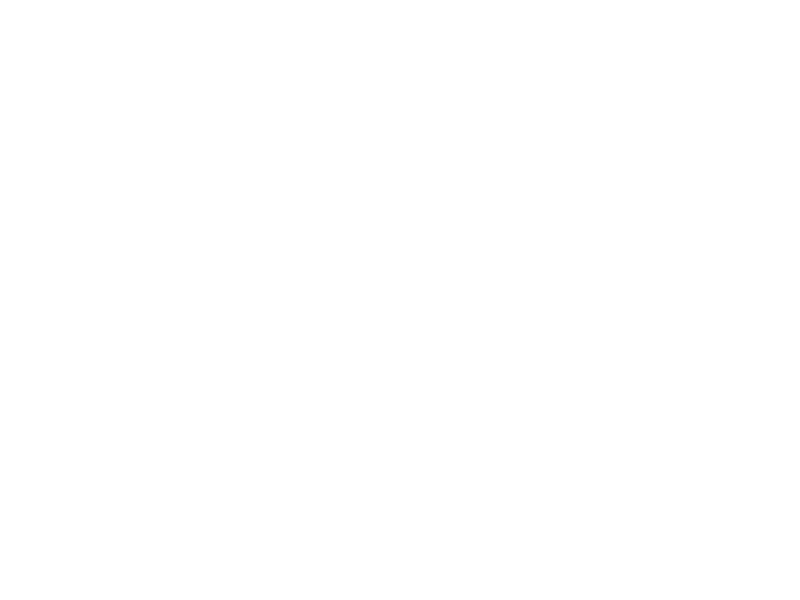

In [9]:
%matplotlib notebook
# x_axis = np.arange(len(mouse_count))

# # Create a bar chart based upon the above data
# plt.bar(x_axis, regimen_timepoint_mice_count, color="b", align="center")

# plt.title("Mice per Timepoint, by Treatment Regimen")
# plt.ylabel("Mice Count")
# plt.xlabel("Regimen")


counts = clean_mouse_df["Drug Regimen"].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()
plt.tight_layout()

## Pie Plots

<IPython.core.display.Javascript object>


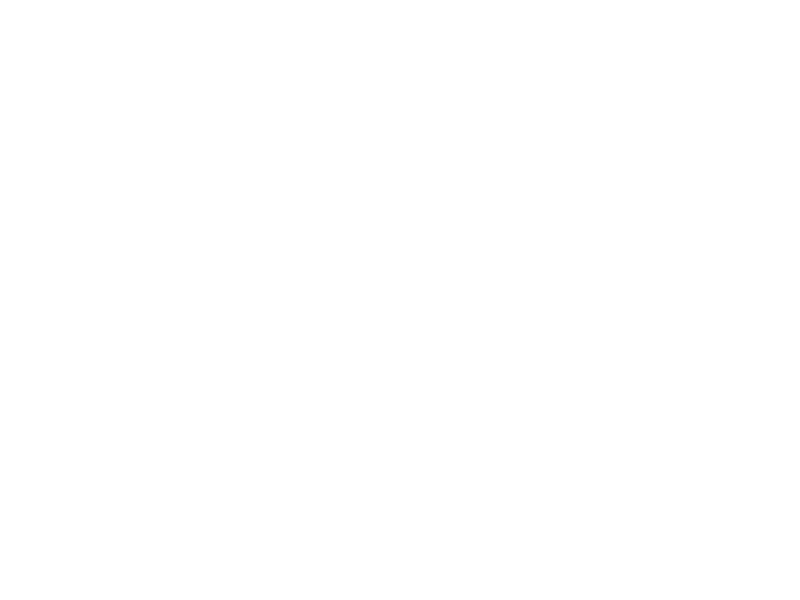

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
%matplotlib notebook

male_mice_df = clean_mouse_df["Sex"] == "Male"
male_mice_df = clean_mouse_df[male_mice_df]
male_mouse_count = male_mice_df["Mouse ID"].nunique()
#print(male_mouse_count)

female_mice_df = clean_mouse_df["Sex"] == "Female"
female_mice_df = clean_mouse_df[female_mice_df]
female_mouse_count = female_mice_df["Mouse ID"].nunique()
#print(female_mouse_count)

gender_summary_df = pd.DataFrame({"Gender": ["Male", "Female"],
                     "Counts": [male_mouse_count,female_mouse_count]},
                                 index=['Male', 'Female'])

colors = ["blue", "pink"]

plot = gender_summary_df.plot.pie(y='Counts', autopct="%1.1f%%", colors = colors)
plot

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook

labels = ["Male", "Female"]
gender_counts = [male_mouse_count, female_mouse_count]
colors = ["blue", "pink"]

plt.pie(gender_counts, labels=labels, colors=colors,
        autopct="%1.1f%%")

<IPython.core.display.Javascript object>

([<matplotlib.patches.Wedge at 0x21c4b01ea08>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')],
 [Text(-0.0037850050782358134, 0.5999880613283548, '50.2%'),
  Text(0.00378500507823574, -0.5999880613283548, '49.8%')])

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 



In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
%matplotlib notebook

capomulin_regimen_df = clean_mouse_df["Drug Regimen"] == "Capomulin"
capomulin_regimen_df = clean_mouse_df[capomulin_regimen_df]
capomulin_regimen_df.head(40)

s185_df = capomulin_regimen_df["Mouse ID"] == "s185"
s185_df = capomulin_regimen_df[s185_df]
s185_df

plt.plot(s185_df["Timepoint"],s185_df["Tumor Volume (mm3)"])
plt.show()

plt.title("Time v Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
%matplotlib notebook
capomulin_id_grouped_df = capomulin_regimen_df.groupby(["Mouse ID"])

weight = capomulin_id_grouped_df["Weight (g)"].mean()
avg_tumor_volume = capomulin_id_grouped_df["Tumor Volume (mm3)"].mean()

weight_tumor_summary_df = pd.DataFrame({"Weight": weight,
                       "Tumor Volume": avg_tumor_volume})
#weight_tumor_summary_df

plt.scatter(weight, avg_tumor_volume, marker="o", facecolors="red", edgecolors="black")

plt.title("Mouse Weight v Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [ ]:
%matplotlib notebook
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Add the linear regression equation and line to plot
x_values = weight_tumor_summary_df['Weight']
y_values = weight_tumor_summary_df['Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(weight,avg_tumor_volume)[0],2)}")